# Resampling methods

In this chapter, we will be introduced to the fundamental concept of sampling. We'll also learn about resampling and why it's important.

<font color=yellow>Sampling is the process of selecting a subset of observations from the population with the purpose of estimating some parameters about the whole population</font>. 
<font color=cyan>Resampling methods, on the other hand, are used to improve the estimates of the population parameters</font>.

## Introduction to sampling

Sampling techniques can be broadly classified into non-probability sampling techniques and probability sampling techniques. Non-probability sampling techniques are based on the judgement of the user, whereas in probability sampling, the observations are selected by chance.

Probability sampling most often includes **simple random sampling (SRS)**, **stratified sampling**, and **systematic sampling**:

* **SRS: In SRS**, each observation in the population has an equal probability of being chosen for the sample.
* **Stratified sampling**: In stratified sampling, the population data is divided into separate groups, called strata. A probability sample is then drawn from each group.
* **Systematic sampling**: In this method, a sample is drawn from the population by choosing observations at regular intervals.

> If the sample is too small or too large, it may lead to incorrect findings. For this reason, **it's important that we've got the right sample size**. A well-designed sample can help identify the biasing factors that can skew the accuracy and reliability of the expected outcome.

Errors might be introduced to our samples for a variety of reasons. **An error might occur due to random sampling**, for example, which is known as **a sampling error**, or because **the method of drawing observations causes the samples to be skewed**, which is known as **sample bias**.

### Getting ready

In [10]:
# We'll import the required libraries. We'll read the data and take a look at the dimensions of our dataset:

# import os for operating system dependent functionalities
import os

# import other required libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Let's read our data. We'll prefix the DataFrame name with df_ to make it easier to understand:

df_housingdata = pd.read_csv("Final_HousePrices.csv")

### How to do it

In [11]:
# 1 We check the dimensions of our DataFrame as follows
df_housingdata.shape

(1460, 80)

In [12]:

# We then look to see if our dataframe has any missing data
df_housingdata.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [13]:
# 3 We separate the predictor and response variable into 2 differents dataframes

# create feature and response variables
X = df_housingdata.iloc[:, 0:79]
y = df_housingdata['SalePrice']

# 4 We split both our predictor and our response datasets into training and testing subsets using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=0)

# 5 We can find the number of observations and columns in each subset as follows:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1021, 79)
(1021,)
(438, 79)
(438,)


### There's more

In this example, we're going to use a dataset in which we measure a dichotomous categorical target variable. It's important to understand that the distribution of both classes of our 

target variable is similar in both the training and testing subsets:

In [15]:
# 1 We start by reading our dataset and looking at its dimensions:
df_creditcarddata = pd.read_csv("creditcarddefault.csv")
df_creditcarddata.shape

(30000, 25)

We have 30,000 observations with 25 variables. The last variable, the default payment next month, is our target variable, which has values that are either 0 or 1.

In [19]:

#2 We separate our data into a feature set and the response variable and split it into training and testing subsets using the following code:
# create feature & response set
X = df_creditcarddata.iloc[:,0:24]
y = df_creditcarddata['default payment next month']

# Create train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y)

Note that, this time, we've used a parameter, `stratify`, in our `train_test_split()` function. The stratify parameter makes a split so that the proportion of values in the sample that's produced is equal to the proportion of values in the variable that's provided to it. Also note that we've assigned the response variable, `y`, to the stratify parameter.

We can now see the distribution of our dichotomous class in our target variable for both the training and testing subsets:


In [20]:
print(pd.value_counts(y_train.values)*100/y_train.shape)
print(pd.value_counts(y_test.values)*100/y_test.shape)

0    77.880952
1    22.119048
dtype: float64
0    77.877778
1    22.122222
dtype: float64


We can also pass another parameter, `shuffle`, to `train_test_split()`. This takes a Boolean value, True or False, to indicate **whether or not to shuffle the data before splitting it. If `shuffle=False`, then stratify must be `None`**.

## K-fold and leave out cross validation

**Machine learning models often face the problem of generalization when they're applied to unseen data to make predictions**. To avoid this problem, **the model isn't trained using the complete dataset**. Instead, the dataset is split into training and testing subsets. **The model is trained on the training data and evaluated on the testing set, which it doesn't see during the training process. This is the fundamental idea behind cross-validation**.

The simplest kind of cross-validation is the holdout method, which we saw in the previous recipe, Introduction to sampling. In the holdout method, when we split our data into training and testing subsets, there's a possibility that the testing set isn't that similar to the training set because of the high dimensionality of the data. This can lead to instability in the outcome. For this reason, it's very important that we sample our data efficiently. We can solve this problem using other cross-validation methods such as **leave-one-out cross-validation (LOOCV)** or **k-fold cross-validation (k-fold CV)**.

k-fold CV is a widely used approach that's used for estimating test errors. The original dataset with N observations is divided into K subsets and the holdout method is repeated K times. In each iteration, K-1 subsets are used as the training set and the rest are used as the testing set. The error is calculated as follows:

![Alt text](10_fold_cross_validation.png)

In LOOCV, the number of subsets K is equal to the number of observations in the dataset, N. LOOCV uses one observation from the original dataset as the validation set and the remaining N-1 observations as the training set. This is iterated N times, so that each observation in the sample is used as the validation data in each iteration. This is the same as k-fold CV, in which K equals N, the number of data points in the set. LOOCV usually takes a lot of computational power because of the large number of iterations required.

In LOOCV, the estimates from each fold are highly correlated and their average can have a high level of variance.

Estimating the test error is based on a single observation and is represented as $MSE = (\bar{y} - \hat{y})^2$ = . We can compute the average of the MSEs for all the folds as follows:

$$
CV_n = \frac{1}{n} \sum^n_{i=1}MSE_i
$$

This calculation is no different from the calculation involved in k-fold CV. We'll use scikit-learn libraries to see how techniques such as k-fold CV and LOOCV can be implemented.

### Getting ready

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# We read our data and split the features and the response variable

# Let's read our data
df_autodata = pd.read_csv('./autompg.csv') 

# Fill NAs with the median value
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(), inplace=True)

# Drop the carname variable
df_autodata.drop(columns=['carname'], axis=1, inplace=True)

X = df_autodata.iloc[:, 1:8]
y = df_autodata.iloc[:, 0]
X = np.array(X)
y = np.array(y)

### How to do it

The k-folds cross-validator provides us with the train and test indices to split the data into training and testing subsets:

In [29]:
# 1 We split the dataset into K consecutive folds (without shuffling b default) with K = 10
kfoldcv = KFold(n_splits=10)
kf_ytests = []
kf_predictedvalues = []
mean_mse = 0.0

for train_index, test_index in kfoldcv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # There is only one y_test and y_pred per iteration over the kfoldcv.split
    # so we append them to the respective lists

    kf_ytests += list(y_test)
    kf_predictedvalues += list(y_pred)
    mse = mean_squared_error(kf_ytests, kf_predictedvalues)
    r2score = r2_score(kf_ytests, kf_predictedvalues)
    print("R^2: {:.2f}, MSE: {:.2f}".format(r2score, mse))
    mean_mse += mse

# 2 We can look at our coefficent of determination using r2_scode() and the mean sqaured error
# using mse()

print("Average CV Score: ", mean_mse/10)

R^2: 0.68, MSE: 8.96
R^2: 0.73, MSE: 9.10
R^2: 0.69, MSE: 9.90
R^2: 0.72, MSE: 9.47
R^2: 0.75, MSE: 8.50
R^2: 0.77, MSE: 8.32
R^2: 0.75, MSE: 9.83
R^2: 0.77, MSE: 10.13
R^2: 0.78, MSE: 12.59
R^2: 0.79, MSE: 12.85
Average CV Score:  9.962852981837415


Text(0, 0.5, 'Predicted mpg')

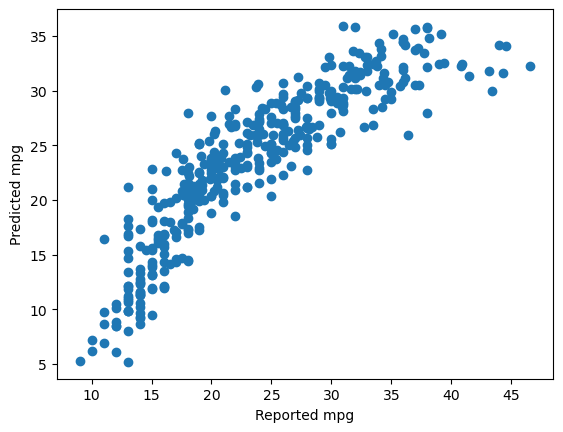

In [30]:
# 3 We plot the predicted values against the actual values of the response variable:
## Let us plot the model
plt.scatter(kf_ytests, kf_predictedvalues)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')

### There's more

We'll now do the same exercise with LOOCV by using LeaveOneOut from sklearn.model_selection:

In [35]:

# 1 We'll read our data once again and split it into the features and response sets:
# Let's read our data. 
df_autodata = pd.read_csv("./autompg.csv")

# Fill NAs with the median value
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(), inplace=True)

# Drop carname variable
df_autodata.drop(['carname'], axis=1, inplace=True)

X = df_autodata.iloc[:, 1:8]
y = df_autodata.iloc[:, 0]
X=np.array(X)
y=np.array(y)

# 2 We use LOOCV to build our models:
from sklearn.model_selection import LeaveOneOut 
loocv = LeaveOneOut()

loo_ytests = []
loo_predictedvalues = []
mean_mse = 0.0

for train_index, test_index in loocv.split(X):
    # the below requires arrays. So we converted the dataframes to arrays
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so we append them to the respective lists.
        
    loo_ytests += list(y_test)
    loo_predictedvalues += list(y_pred)
    
    mse = mean_squared_error(loo_ytests, loo_predictedvalues)
    r2score = r2_score(loo_ytests, loo_predictedvalues)
    print("R^2: {:.2f}, MSE: {:.2f}".format(r2score, mse))
    mean_mse += mse

# 3 We can look at our coefficient of determination using r2_score() and the mean squared error using mse():
print("Average CV Score :", mean_mse/X.shape[0]) 
# We can take a look at the coefficient of determination, and the mean squared error for the LOOCV results:

c:\Users\HP\miniconda3\envs\sklearn\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


R^2: nan, MSE: 9.37
R^2: -1.28, MSE: 5.12
R^2: -1.95, MSE: 5.90
R^2: -1.73, MSE: 4.60
R^2: -2.32, MSE: 4.51
R^2: -3.47, MSE: 7.09
R^2: -2.68, MSE: 7.82
R^2: -2.52, MSE: 8.31
R^2: -2.73, MSE: 9.12
R^2: -2.82, MSE: 8.56
R^2: -2.77, MSE: 7.80
R^2: -2.44, MSE: 7.15
R^2: -2.43, MSE: 6.61
R^2: -3.75, MSE: 9.12
R^2: -0.31, MSE: 8.51
R^2: -0.03, MSE: 8.55
R^2: -0.02, MSE: 8.17
R^2: 0.11, MSE: 7.71
R^2: 0.45, MSE: 7.43
R^2: 0.57, MSE: 7.13
R^2: 0.59, MSE: 7.58
R^2: 0.61, MSE: 7.39
R^2: 0.64, MSE: 7.29
R^2: 0.66, MSE: 7.29
R^2: 0.66, MSE: 7.02
R^2: 0.70, MSE: 6.97
R^2: 0.73, MSE: 6.80
R^2: 0.74, MSE: 6.81
R^2: 0.75, MSE: 6.82
R^2: 0.78, MSE: 6.61
R^2: 0.77, MSE: 7.11
R^2: 0.78, MSE: 6.90
R^2: 0.79, MSE: 6.71
R^2: 0.79, MSE: 6.70
R^2: 0.79, MSE: 6.51
R^2: 0.79, MSE: 6.33
R^2: 0.79, MSE: 6.21
R^2: 0.79, MSE: 6.05
R^2: 0.78, MSE: 6.07
R^2: 0.78, MSE: 6.24
R^2: 0.78, MSE: 6.18
R^2: 0.78, MSE: 6.14
R^2: 0.76, MSE: 6.66
R^2: 0.75, MSE: 6.94
R^2: 0.71, MSE: 7.96
R^2: 0.71, MSE: 7.85
R^2: 0.71, MSE: 7.7

Text(0, 0.5, 'Predicted mpg')

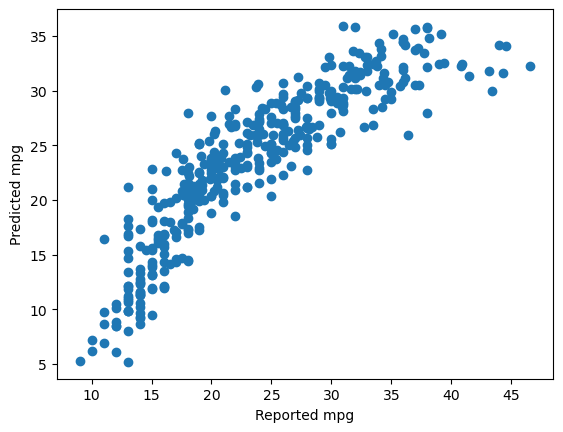

In [36]:
## Let us plot the model
plt.scatter(kf_ytests, kf_predictedvalues)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')

## Boostrapping

**Bootstrapping is based on the jackknife method**, which was proposed by Quenouille in 1949, and then refined by Tukey in 1958. The jackknife method is used for testing hypotheses and estimating confidence intervals. It's obtained by calculating the estimate after leaving out each observation and then computing the average of these calculations. With a sample of size N, the jackknife estimate can be found by aggregating the estimates of every N-1 sized sub-sample. It's similar to bootstrap samples, but while the bootstrap method is sampling with replacement, the jackknife method samples the data without replacement.

**Bootstrapping is a powerful, non-parametric resampling technique that's used to assess the uncertainty in the estimator**. **In bootstrapping, a large number of samples with the same size are drawn repeatedly from an original sample. This allows a given observation to be included in more than one sample, which is known as sampling with replacement**. In the bootstrap method, $n$ samples are created from the original data by sampling with replacement. Each sample is of identical size. The larger $n$, the closer the set of samples will be to the ideal bootstrap sample.

> "The essence of bootstrapping is the idea that in the absence of any other knowledge about a population, the distribution of values found in a random sample of size $n$ from the population is the best guide to the distribution in the population. Therefore to approximate what would happen if the population was resampled, it's sensible to resample the sample. In other words, the infinite population that consists of the $n$ observed sample values, each with probability $\frac{1}{n}$, is used to model the unknown real population." –Bryan F. J. Manly

A diagrammatic representation of a bootstrap sample would look as follows:

![Alt text](boostraping_sample.png)

Let's say that we have n bootstrap samples from our original sample. $\hat{\theta_i}$ denotes the estimates of the $n$ bootstrap samples where $i=1,2,3 \dots,n$. If $\hat{\theta_i}$ denotes the estimate of the parameter for the original sample, the standard error for $\hat{\theta_i}$ is given as follows:

$$
SE(\hat{\theta}) = \sqrt{\frac{1}{n-1}\sum^n_{i=1}(\hat{\theta_i} - \bar{\theta}})^2
$$

$\bar{\theta}$ is given as follows:

$$
\bar{\theta} = (\frac{1}{n})\sum^n_{i=1}\hat{\theta_i}
$$
$\bar{\theta}$ is the mean of the estimates across the $n$ bootsrap samples

### Getting ready

In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.utils import resample

# We load our data and fill in the missing values with the median for the horsepower variable. We also drop the carname variable:

# Let's read our data. We prefix the data frame name with "df_" for easier understanding.
df_autodata = pd.read_csv("autompg.csv")
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(), inplace=True)
df_autodata.drop(['carname'], axis=1, inplace=True)

### How to do it

Now that we have read our data, let's see how we can perform bootstrap sampling:

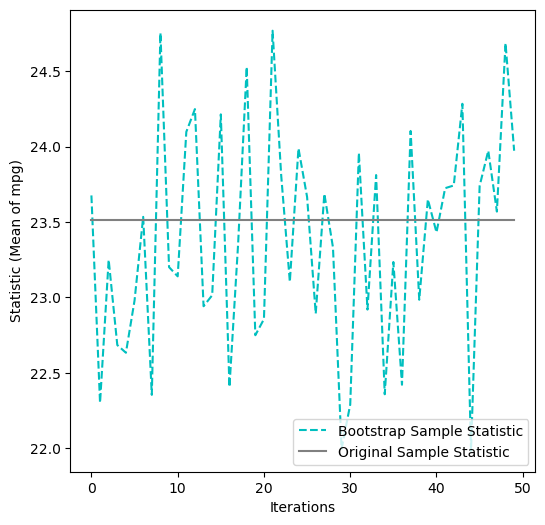

In [38]:
# 1 We write a custom function, create_bootstrap_oob(),
# which takes a DataFrame as a parameter and uses the
# resample() function from sklearn.utils to create a bootstrap sample with 100 observations:
# This custom function takes a dataframe as an argument
def create_bootstrap_oob(df):
    global df_OOB
    global df_bootstrap_sample 
    
    # creating the bootstrap sample
    df_bootstrap_sample = resample(df, replace=True, n_samples=100)
    
    # creating the OOB sample 
    bootstrap_sample_index = tuple(df_bootstrap_sample.index)
    bootstrap_df = df.index.isin(bootstrap_sample_index)
    df_OOB = df[~bootstrap_df]

# 2 We loop through 50 iterations and call the custom function by
# passing the df_autodata DataFrame. We capture the mean of the mpg
# variable for each bootstrap sample, which we'll measure against
# the mean of the mpg variable in our original DataFrame, which is
# df_autodata:
iteration=50
bootstap_statistics=list()
originalsample_statistics=list()

for i in range(iteration):
    # Call custom function create_bootstrap_oob(). Pass df_autodata
    create_bootstrap_oob(df_autodata)
    
    # Capture mean value of mpg variable for all bootstrap samples
    bootstap_statistics.append(df_bootstrap_sample.iloc[:,0].mean())
    originalsample_statistics.append(df_autodata['mpg'].mean())

# 3 We plot the mean of the mpg variable for each iteration, for which a separate bootstrap sample has been considered. We capture the mean of the mpg variable for each bootstrap sample in each iteration:
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize=(6,6))

plt.plot(bootstap_statistics, 'c--', label='Bootstrap Sample Statistic')
plt.plot(originalsample_statistics, 'grey', label='Original Sample Statistic')
plt.xlabel('Iterations')
plt.ylabel('Statistic (Mean of mpg)')
plt.legend(loc=4)
plt.show()

### How it works

In Step 1, we created a custom function, `create_bootstrap_oob( )`, and used the `resample()` function from `sklearn.utils` to create a bootstrap sample with $100$ observations. The `create_bootstrap_oob( )` custom function took a DataFrame as an input parameter and created both bootstrap and Out-Of-the-Bag (OOB) samples.

We mentioned that bootstrap sampling is sampling with replacement. This means that any given observation can appear more than once in a single sample.
In Step 2, we looped through the 50 iterations and called the `create_bootstrap_oob( )` custom function by passing df_autoframe. We captured the mean of the mpg variable for each bootstrap sample. In Step 3, we considered a separate bootstrap sample for each iteration. We captured the mean of the mpg variable against each iteration and then plotted the mean of the mpg variable for each iteration.